In [ ]:
# to extract NER tags only from label-studio output
def extract_tokens_and_ner_tags(lines):
    token_tag_pairs = []
    for line in lines:
        line = line.strip()
        if not line:
            token_tag_pairs.append(("", ""))  # Sentence boundary
            continue

        # Handle format: token -X- _ TAG
        if '-X-' in line and '_' in line:
            try:
                parts = line.split()
                token = parts[0]
                tag = parts[-1]
                token_tag_pairs.append((token, tag))
            except:
                continue
        # Handle: token \t TAG
        elif '\t' in line:
            token, tag = line.split('\t')
            token_tag_pairs.append((token.strip(), tag.strip()))
        # Handle: token TAG
        elif len(line.split()) == 2:
            token, tag = line.split()
            token_tag_pairs.append((token.strip(), tag.strip()))
        else:
            continue

    return token_tag_pairs

def save_to_conll(pairs, output_file="output.conll"):
    with open(output_file, "w", encoding="utf-8") as f:
        for token, tag in pairs:
            if token == "" and tag == "":
                f.write("\n")  # Sentence break
            else:
                f.write(f"{token} {tag}\n")

if __name__ == "__main__":
    input_path = "datasets/annotated_ner_1.conll"     # Update this to your input file
    output_path = "datasets/annotate_with_ai/clean_annotated_ner_1.conll"       # Output path

    with open(input_path, "r", encoding="utf-8") as f:
        lines = f.readlines()

    pairs = extract_tokens_and_ner_tags(lines)
    save_to_conll(pairs, output_path)

    print(f"✅ Saved {len(pairs)} token-tag pairs to {output_path}")


✅ Saved 88034 token-tag pairs to datasets/annotate_with_ai/clean_annotated_ner_1.conll


In [9]:
import os

def split_txt_file(input_txt_path, output_dir, lines_per_chunk=7000):
    # Read all lines from the .txt file
    with open(input_txt_path, "r", encoding="utf-8") as f:
        lines = [line.rstrip() for line in f if line.strip()]

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Split and save chunks
    start_line = 27001  # Starting from line 27002
    file_index = 1
    while start_line < len(lines):
        end_line = min(start_line + lines_per_chunk, len(lines))
        chunk_lines = lines[start_line:end_line]

        output_path = os.path.join(output_dir, f"split_part_{file_index}.txt")
        with open(output_path, "w", encoding="utf-8") as f:
            f.write("\n".join(chunk_lines))

        print(f"Saved: {output_path} ({len(chunk_lines)} lines)")

        start_line = end_line
        file_index += 1

In [ ]:
# input_path = 'datasets/ner_text.txt'
# output_path = "datasets/annotate_with_ai"
# split_txt_file(input_path, output_path, lines_per_chunk=7000)

Saved: datasets/annotate_with_ai\split_part_1.txt (7000 lines)
Saved: datasets/annotate_with_ai\split_part_2.txt (7000 lines)
Saved: datasets/annotate_with_ai\split_part_3.txt (7000 lines)
Saved: datasets/annotate_with_ai\split_part_4.txt (7000 lines)
Saved: datasets/annotate_with_ai\split_part_5.txt (7000 lines)
Saved: datasets/annotate_with_ai\split_part_6.txt (7000 lines)
Saved: datasets/annotate_with_ai\split_part_7.txt (2713 lines)


In [12]:
def convert_pos_to_conll(input_path, output_path):
    """
    Convert POS-tagged text (word/POS format) to CoNLL format.
    
    Args:
        input_path (str): Path to the input .txt file.
        output_path (str): Path to the output .conll file.
    """
    with open(input_path, 'r', encoding='utf-8') as infile, open(output_path, 'w', encoding='utf-8') as outfile:
        for line in infile:
            line = line.strip()
            if not line:
                continue  # skip empty lines

            tokens = line.split()
            for token in tokens:
                if '/' in token:
                    word, pos = token.rsplit('/', 1)
                    outfile.write(f"{word} {pos}\n")
                else:
                    # in case there's a token without POS
                    outfile.write(f"{token} O\n")
            outfile.write("\n")  # Sentence separator



In [ ]:
#convert_pos_to_conll("ner_myword_tokenize_pos_tagged.txt", "pos_tagged_conll.conll")

In [1]:
def strip_pos_keep_ner(input_path, output_path):
    """
    Remove POS tag from a CoNLL-style file (token POS NER) and keep only token and NER tag.

    Args:
        input_path (str): Path to the input file.
        output_path (str): Path to save the output file.
    """
    with open(input_path, 'r', encoding='utf-8') as infile, open(output_path, 'w', encoding='utf-8') as outfile:
        for line in infile:
            line = line.strip()
            if not line:
                outfile.write("\n")
                continue

            parts = line.split()
            if len(parts) == 3:
                token, _, ner = parts
                outfile.write(f"{token} {ner}\n")
            else:
                # Handle cases with unexpected format
                outfile.write(line + "\n")


In [4]:
import os
def process_folder(input_folder, output_folder, prefix="bio_without_pos"):
    """
    Process all .txt files in the folder to strip POS and keep only NER tags.

    Args:
        input_folder (str): Folder containing input .txt files.
        output_folder (str): Folder to write processed output files.
        prefix (str): Prefix to add to output filenames.
    """
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        print(f"Processing file: {filename}")
        if filename.endswith(".conll"):
            input_path = os.path.join(input_folder, filename)
            output_filename = prefix + filename
            output_path = os.path.join(output_folder, output_filename)

            strip_pos_keep_ner(input_path, output_path)
            print(f"Processed: {filename} → {output_filename}")

In [5]:
input_dir = "datasets/annotate_with_ai/bio_tagging/corrected"
output_dir = "datasets/annotate_with_ai/bio_tagging/bio_without_pos"

process_folder(input_dir, output_dir)

Processing file: tagged_no_tag_ner_1.conll
Processed: tagged_no_tag_ner_1.conll → bio_without_postagged_no_tag_ner_1.conll
Processing file: tagged_no_tag_ner_10.conll
Processed: tagged_no_tag_ner_10.conll → bio_without_postagged_no_tag_ner_10.conll
Processing file: tagged_no_tag_ner_11.conll
Processed: tagged_no_tag_ner_11.conll → bio_without_postagged_no_tag_ner_11.conll
Processing file: tagged_no_tag_ner_12.conll
Processed: tagged_no_tag_ner_12.conll → bio_without_postagged_no_tag_ner_12.conll
Processing file: tagged_no_tag_ner_2.conll
Processed: tagged_no_tag_ner_2.conll → bio_without_postagged_no_tag_ner_2.conll
Processing file: tagged_no_tag_ner_3.conll
Processed: tagged_no_tag_ner_3.conll → bio_without_postagged_no_tag_ner_3.conll
Processing file: tagged_no_tag_ner_4.conll
Processed: tagged_no_tag_ner_4.conll → bio_without_postagged_no_tag_ner_4.conll
Processing file: tagged_no_tag_ner_5.conll
Processed: tagged_no_tag_ner_5.conll → bio_without_postagged_no_tag_ner_5.conll
Process

In [16]:
def bioes_to_bio(ner_tag: str) -> str:
    """
    Convert a BIOES tag to BIO format.
    """
    if ner_tag.startswith("S-"):
        return "B-" + ner_tag[2:]
    elif ner_tag.startswith("E-"):
        return "I-" + ner_tag[2:]
    elif ner_tag.startswith("B-") or ner_tag.startswith("I-") or ner_tag == "O":
        return ner_tag
    elif ner_tag.startswith("O"):
        return "O"
    else:
        # Unknown tag format, return as-is (or raise warning if needed)
        return ner_tag


def convert_bioes_file(input_path, output_path):
    """
    Convert a BIOES-tagged file to BIO format.
    Handles both 2-column (token NER) and 3-column (token POS NER) formats.

    Args:
        input_path (str): Path to the input file.
        output_path (str): Path to save the BIO-converted output.
    """
    with open(input_path, 'r', encoding='utf-8') as infile, \
         open(output_path, 'w', encoding='utf-8') as outfile:

        for line in infile:
            line = line.strip()
            if not line:
                outfile.write('\n')
                continue

            parts = line.split()
            if len(parts) == 2:
                token, ner = parts
                bio_ner = bioes_to_bio(ner)
                outfile.write(f"{token} {bio_ner}\n")
            elif len(parts) == 3:
                token, pos, ner = parts
                bio_ner = bioes_to_bio(ner)
                outfile.write(f"{token} {pos} {bio_ner}\n")
            else:
                # Malformed line, write it back unchanged (or skip if preferred)
                outfile.write(line + '\n')


In [22]:
import os

def process_folder_bioes_to_bio(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    for filename in os.listdir(input_folder):
        print(f"Processing file: {filename}")
        if filename.endswith((".txt", ".conll")):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)
            convert_bioes_file(input_path, output_path)
            print(f"Converted: {filename}")
input_dir = "datasets/annotate_with_ai/bioes tagging/bioes with pos"
output_dir = "datasets/annotate_with_ai/bio with pos"
process_folder_bioes_to_bio(input_dir, output_dir)

Processing file: tagged_no_tag_ner_1.conll
Converted: tagged_no_tag_ner_1.conll
Processing file: tagged_no_tag_ner_10.conll
Converted: tagged_no_tag_ner_10.conll
Processing file: tagged_no_tag_ner_11.conll
Converted: tagged_no_tag_ner_11.conll
Processing file: tagged_no_tag_ner_12.conll
Converted: tagged_no_tag_ner_12.conll
Processing file: tagged_no_tag_ner_2.conll
Converted: tagged_no_tag_ner_2.conll
Processing file: tagged_no_tag_ner_3.conll
Converted: tagged_no_tag_ner_3.conll
Processing file: tagged_no_tag_ner_4.conll
Converted: tagged_no_tag_ner_4.conll
Processing file: tagged_no_tag_ner_5.conll
Converted: tagged_no_tag_ner_5.conll
Processing file: tagged_no_tag_ner_6.conll
Converted: tagged_no_tag_ner_6.conll
Processing file: tagged_no_tag_ner_7.conll
Converted: tagged_no_tag_ner_7.conll
Processing file: tagged_no_tag_ner_8.conll
Converted: tagged_no_tag_ner_8.conll
Processing file: tagged_no_tag_ner_9.conll
Converted: tagged_no_tag_ner_9.conll


In [1]:
import os

def correct_token_tags_in_conll(input_path, output_path, corrections):
    """
    Corrects token-level POS or entity tag based on a corrections dictionary.
    
    Args:
        input_path (str): Path to the input .conll file.
        output_path (str): Path to write the corrected .conll file.
        corrections (dict): Dictionary of token to (correct_pos, correct_entity) tuples.
                           Use None for values you don't want to change.
    """
    with open(input_path, 'r', encoding='utf-8') as infile, \
         open(output_path, 'w', encoding='utf-8') as outfile:
        
        for line in infile:
            line = line.strip()
            if not line:
                outfile.write("\n")
                continue

            #parts = line.split()
            parts = line.strip().split("\t")
            if len(parts) == 3:
                token, pos, ent = parts
                if token in corrections:
                    correct_pos, correct_ent = corrections[token]
                    pos = correct_pos if correct_pos else pos
                    ent = correct_ent if correct_ent else ent
                #outfile.write(f"{token} {pos} {ent}\n")
                outfile.write(f"{token}\t{pos}\t{ent}\n")

            else:
                outfile.write(line + "\n")


def apply_corrections_to_directory(input_dir, output_dir, corrections):
    """
    Applies token corrections to all .conll files in a directory (recursively).

    Args:
        input_dir (str): Root input directory containing .conll files.
        output_dir (str): Root output directory to save corrected files.
        corrections (dict): Dictionary of token to (correct_pos, correct_entity).
                            Example: {"ဘီဘီစီ": ("abb", "B-ORG")}
    """
    for root, _, files in os.walk(input_dir):
        for filename in files:
            if filename.endswith('.conll'):
                input_path = os.path.join(root, filename)
                relative_path = os.path.relpath(input_path, input_dir)
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                correct_token_tags_in_conll(input_path, output_path, corrections)


In [2]:
import os

def apply_corrections_to_file(input_file, output_file, corrections):
    corrected_lines = []

    # Step 1: Read the file first
    with open(input_file, 'r', encoding='utf-8') as infile:
        for line in infile:
            line = line.strip()
            if not line:
                corrected_lines.append("")
                continue

            #parts = line.split()
            parts = line.strip().split("\t")
            if len(parts) == 3:
                token, pos, entity = parts
                if token in corrections:
                    correct_pos, correct_entity = corrections[token]

                    # Only replace if needed
                    pos = correct_pos if correct_pos is not None else pos
                    entity = correct_entity if correct_entity is not None else entity

                #corrected_lines.append(f"{token} {pos} {entity}")
                corrected_lines.append(f"{token}\t{pos}\t{entity}")
            else:
                # If the format is wrong, just keep the line as-is
                corrected_lines.append(line)

    # Step 2: Write to file *after* reading and correcting
    with open(output_file, 'w', encoding='utf-8') as outfile:
        outfile.write("\n".join(corrected_lines) + "\n")

In [4]:
def correct_token_sequences_in_file(file_path, sequence_corrections):
    """
    Correct sequences of consecutive tokens in a CoNLL file with 3 columns (token, pos, entity).

    Args:
        file_path (str): Path to the input .conll file. The same file will be overwritten.
        sequence_corrections (list of dict): Each dict should have:
            - 'tokens': List of token strings to match (e.g., ["စစ်", "ကောင်စီ"])
            - 'pos':    List of POS tags to correct to (or None to keep original)
            - 'ner':    List of NER tags to correct to
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    corrected_lines = []
    i = 0
    while i < len(lines):
        matched = False
        for correction in sequence_corrections:
            tokens = correction['tokens']
            pos_tags = correction.get('pos', [None] * len(tokens))
            ner_tags = correction['ner']

            if i + len(tokens) <= len(lines):
                window = lines[i:i+len(tokens)]

                if all(
                    window[j].strip() and window[j].strip().split()[0] == tokens[j]
                    for j in range(len(tokens))
                ):
                    # Apply corrections
                    for j in range(len(tokens)):
                        parts = window[j].strip().split()
                        #parts = window[j].strip().split("\t")
                        if len(parts) == 3:
                            token, old_pos, _ = parts
                            new_pos = pos_tags[j] if pos_tags[j] else old_pos
                            try:
                                new_ner = ner_tags[j]
                            except IndexError:
                                print(f"IndexError: ner_tags index out of range at file line {i + j + 1}")
                                print(f"ner_tags length: {len(ner_tags)}, j: {j}")
                                print(f"tokens: {tokens}")
                                raise
                            #corrected_lines.append(f"{token} {new_pos} {new_ner}")
                            corrected_lines.append(f"{token}\t{new_pos}\t{new_ner}")
                    # for j in range(len(tokens)):
                    #     parts = window[j].strip().split()
                    #     #parts = window[j].strip().split("\t")
                    #     if len(parts) == 3:
                    #         token, old_pos, _ = parts
                    #         new_pos = pos_tags[j] if pos_tags[j] else old_pos
                    #         new_ner = ner_tags[j]
                    #         #corrected_lines.append(f"{token} {new_pos} {new_ner}")
                    #         corrected_lines.append(f"{token}\t{new_pos}\t{new_ner}")

                    i += len(tokens)
                    matched = True
                    break

        if not matched:
            corrected_lines.append(lines[i].strip())
            i += 1

    with open(file_path, 'w', encoding='utf-8') as f:
        f.write('\n'.join(corrected_lines) + '\n')


In [ ]:
corrections4 = {
    "မနက်ဖြန်" : ("n", "B-DATE"),

   
 }


input_dir = "datasets/annotate_with_ai/bio_tagging/corrected"
output_dir = "datasets/annotate_with_ai/bio_tagging/corrected1"

apply_corrections_to_directory(input_dir, output_dir, corrections4)

In [17]:
sequence_corrections4 =[  
              {
        "tokens": ["မယ်", "စုံ","မြို့နယ်"],
        "pos":    [None,None,None],  
        "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
         {
        "tokens": ["ကပ်", "သပြေ"],
        "pos":    [None,None],  
        "ner":    ["B-LOC", "I-LOC"],
      },
         {
        "tokens": ["နမ့်", "ခုတ်","မြစ်"],
        "pos":    [None,None,None],  
        "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
        {
        "tokens": ["ကျောက်", "တာ"],
        "pos":    [None,None],  
        "ner":    ["B-LOC", "I-LOC"],
      },
        {
        "tokens": ["သစ်ဆိမ့်", "ကြီး","ရွာ"],
        "pos":    [None,None,None],  
        "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
        {
        "tokens": ["မြန်မာ့", "ငလျင်"],
        "pos":    [None,None],  
        "ner":    ["B-LOC", "O"],
      },
          {
        "tokens": ["မြန်မာ", "ငလျင်"],
        "pos":    [None,None],  
        "ner":    ["B-LOC", "O"],
      },
           {
        "tokens": ["ပန်း", "တောင်း","မြို့"],
        "pos":    [None,None,None],  
        "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
            {
        "tokens": ["ညောင်", "ကျိုး"],
        "pos":    [None,None],  
        "ner":    ["B-LOC", "I-LOC"],
      },
        {
        "tokens": ["ညောင်", "ခြေ","ထောက်","ရွာ"],
        "pos":    [None,None,None,None],  
        "ner":    ["B-LOC", "I-LOC", "I-LOC", "I-LOC"],
      },
              {
        "tokens": ["ဥသျှစ်ပင်", "လမ်းဆုံ"],
        "pos":    [None,None],  
        "ner":    ["B-LOC", "I-LOC"],
      },
             {
        "tokens": ["ဥသျှစ်ပင်", "မြို့"],
        "pos":    [None,None],  
        "ner":    ["B-LOC", "I-LOC"],
      },
         {
        "tokens": ["မြန်မာ", "ြည်တွင်းစစ်"],
        "pos":    [None,None],  
        "ner":    ["B-LOC", "O"],
      },
          {
        "tokens": ["၇", "မိုင်","ရွာ"],
        "pos":    [None,None,None],  
        "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
       {
        "tokens": ["ဓညဝတီ", "ရေ","တပ်","ဌာနချုပ်"],
        "pos":    [None,None,None,None],  
        "ner":    ["B-LOC", "I-LOC", "I-LOC", "I-LOC"],
      },
         {
        "tokens": ["ရှောက်", "ချောင်း","ကျေးရွာ"],
        "pos":    [None,None,None],  
        "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
         {
        "tokens": ["ခန်း", "ခေါင်","ကျွန်း"],
        "pos":    [None,None,None],  
        "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
         {
        "tokens": ["ဖီလာဒဲလ်ဖီယာ", "မြို့"],
        "pos":    [None,None],  
        "ner":    ["B-LOC", "I-LOC"],
      },
         {
        "tokens": ["ဂုတ်", "စီး","ရိုး","ကျေးရွာ"],
        "pos":    [None,None,None,None],  
        "ner":    ["B-LOC", "I-LOC", "I-LOC", "I-LOC"],
      },
          {
        "tokens": ["မယ်", "ထော်","သ","လေး","ကျေးရွာ"],
        "pos":    [None,None,None,None,None],  
        "ner":    ["B-LOC", "I-LOC", "I-LOC", "I-LOC", "I-LOC"],
      },
         {
        "tokens": ["ကိုးကန့်", "မြို့"],
        "pos":    [None,None],  
        "ner":    ["B-LOC", "I-LOC"],
      },

      {
        "tokens": ["ဒေါင်", "မေ", "ဥယျာဉ်"],
        "pos":    [None,None,None],  
        "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
        "tokens": ["ရွှေသောင်ယံ"],
        "pos":    [None],
        "ner":    ["B-LOC"],
      },
      {
        "tokens": ["ဆိပ်", "မူ", "ကျေးရွာ"],
        "pos":    [None,None,None],  
        "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
       {
        "tokens": ["ဆိပ်", "မူ", "ရွာ"],
        "pos":    [None,None,None],  
        "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
       {
        "tokens": ["စ", "ပေါ့", "ကျေးရွာ"],
        "pos":    [None,None,None],  
        "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ကံ", "ဆီး", "ရွာ"],
          "pos":    [None,None,None],  
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["အ", "နန့်", "ပါ"],
          "pos":    [None,None,None],  
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["မ", "လွန်", "မြို့"],
          "pos":    [None,None,None],  
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ပဲ", "ကုန်း", "ကြီး","ကျေးရွာ"],
          "pos":    [None,None,None,None],  
          "ner":    ["B-LOC", "I-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ပဲ", "ကုန်း", "ကြီး","ရွာ"],
          "pos":    [None,None,None,None],  
          "ner":    ["B-LOC", "I-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["မျှား", "ပိုင်း", "ရွာ"],
          "pos":    [None,None,None],  
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["အနီး", "စခန်း"],
          "pos":    [None,None],  
          "ner":    ["B-LOC", "I-LOC"],
      },
      {
          "tokens": ["အပေါက်ဝ", "ကျေးရွာ"],
          "pos":    [None,None],  
          "ner":    ["B-LOC", "I-LOC"],
      },
      {
          "tokens": ["သံခဲ", "ချိုင်", "ရွာ"],
          "pos":    [None,None,None],  
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["သံခဲ", "ချိုင်"],
          "pos":    [None,None],  
          "ner":    ["B-LOC", "I-LOC"],
      },
      {
          "tokens": ["အုန်း", "ဖန်", "မြို့နယ်"],
          "pos":    [None,None,None],  
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ပ", "ဒါန်း", "ရွာ"],
          "pos":    [None,None,None],  
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ကျောက်", "စ", "ကွဲ"],
          "pos":    [None,None,None],  
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
       {
          "tokens": ["ကျောက်", "စ", "ကွဲ","ကျေးရွာ"],
          "pos":    [None,None,None,None],  
          "ner":    ["B-LOC", "I-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ဇာ", "ဒက်", "ကြီး", "ကျွန်း"],
          "pos":    [None, None, None, None],
          "ner":    ["B-LOC", "I-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["သံ", "ကျွန်း"],
          "pos":    [None, None],
          "ner":    ["B-LOC", "I-LOC"],
      },
      {
          "tokens": ["နောင်", "လောင်း", "ရွာ"],
          "pos":    [None, None, None],
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["တောင်", "ပြို", "လက်ဝဲ", "မြို့"],
          "pos":    [None, None, None, None],
          "ner":    ["B-LOC", "I-LOC", "I-LOC", "I-LOC"], 
      },
      {
          "tokens": ["ကြွေ", "ချိုင်", "ကျေးရွာ"],
          "pos":    [None, None, None],
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["နောင်", "ဘူ", "ရီ"],
          "pos":    [None, None, None],
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ကိုးကန့်", "ဒေသ"],
          "pos":    [None, None],
          "ner":    ["B-LOC", "I-LOC"],
      },
      {
          "tokens": ["ကူ", "တော်", "ရွာ"],
          "pos":    [None, None, None],
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["စီ", "ပါ", "ရွာ"],
          "pos":    ["part", "part", "n"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["မော့", "က", "နင်", "တံတား"],
          "pos":    ["n", "ppm", "pron", "n"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ဖော်", "တော်", "ဦး", "ဘုရား"],
          "pos":    ["v", "part", "part", "n"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ကေ", "လာ", "ကျေးရွာ"],
          "pos":    ["v", "n", "n"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["အင်း", "ခြံ", "ရွာ"],
          "pos":    ["part", "n", "n"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
       {
          "tokens": ["က", " ျိန္တလီ", "မြို့"],
          "pos":    ["part", "n", "n"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
        {
          "tokens": ["လေး", "မျက်နှာ", "နတ်ကွန်း"],
          "pos":    ["tn", "n", "n"],
          "ner":    ["O", "O", "O"],
      },
      {
          "tokens": ["မြ", "တောင်"],
          "pos":    ["n", "part"],
          "ner":    ["B-LOC", "I-LOC"],
      },
      {
          "tokens": ["မ", "ဟာ", "ချိုင်"],
          "pos":    ["part", "ppm", "n"],
          "ner":    ["O", "O", "O"],
      },
      {
          "tokens": ["ဖင်လန်"],
          "pos":    ["n"],
          "ner":    ["B-LOC"],
      },
      {
          "tokens": ["တွံတေး"],
          "pos":    ["n"],
          "ner":    ["B-LOC"],
      },
      {
          "tokens": ["လှိုင်သာယာ"],
          "pos":    ["n"],
          "ner":    ["B-LOC"],
      },
      {
          "tokens": ["အလွမ်း", "တောင်"],
          "pos":    ["n", "part"],
          "ner":    ["B-LOC", "I-LOC"],
      },
      {
          "tokens": ["ဆူ", "ရ", "်", "ခွား", "မြို့နယ်"],
          "pos":    ["part", "part", "n", "n", "n"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ဟိုက်", "ပါ", "ကျေးရွာ"],
          "pos":    ["v", "part", "n"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ပ", "ခန်း", "ကြီး", "မြို့"],
          "pos":    ["part", "n", "adj", "n"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ခိုင်", "ကမ်း", "မြို့"],
          "pos":    ["v", "n", "n"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["စကား", "ကင်း", "ကျေးရွာ"],
          "pos":    ["n", "n", "n"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["သုဝဏ္ဏ", "ဝတီ", "မြို့"],
          "pos":    ["n", "n", "n"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["လင်း", "ခ", "ေး"],
          "pos":    ["n", "n", "n"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ကို", "ထ", "ရီ", "မြို့"],
          "pos":    ["ppm", "v", "n", "n"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ဘာ", "တွန်", "ပင်လယ်အော်"],
          "pos":    ["pron", "v", "part"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ဘဂ္ဂဒက်"],
          "pos":    ["n"],
          "ner":    ["B-LOC"],
      },
      {
          "tokens": ["အိန္ဒိယ", "သံရုံး"],
          "pos":    ["n", "n"],
          "ner":    ["B-LOC", "I-LOC"],
      },
      {
          "tokens": ["ဆာဘီးယား"],
          "pos":    ["n"],
          "ner":    ["B-LOC"],
      },
      {
          "tokens": ["မွန်တီနီဂရိုး"],
          "pos":    ["n"],
          "ner":    ["I-LOC"],
      },
      {
          "tokens": ["မက်ဆီ", "ဒို", "နာ"],
          "pos":    ["n", "n", "v"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ဆူ", "လာ", "ဝေ", "ဆီ"],
          "pos":    ["part", "part", "n", "ppm"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC", "I-LOC"],
      },
      {
          "tokens": ["ဒိုက်ဦး"],
          "pos":    ["n"],
          "ner":    ["B-LOC"],
      },
      {
          "tokens": ["စီ", "မီး", "အူး", "လူ", "ကျွန်း"],
          "pos":    ["part", "n", "n", "n", "n"],
          "ner":    ["B-LOC", "I-LOC", "I-LOC", "I-LOC", "I-LOC"],
      }
   
]

import os

input_dir = os.path.abspath(r"datasets/temp/")
print(input_dir)
# if not os.path.exists(input_dir):
#     raise FileNotFoundError(f"Directory does not exist: {input_dir}")
for filename in os.listdir(input_dir):
    if filename.endswith(".conll"):
        file_path = os.path.join(input_dir, filename)
        print(f"Processing: {file_path}")
        correct_token_sequences_in_file(file_path, sequence_corrections4)

c:\Users\nuwai\Documents\Sophia_Skill_Development\Sophia_projects\burmese_NER\datasets\temp
Processing: c:\Users\nuwai\Documents\Sophia_Skill_Development\Sophia_projects\burmese_NER\datasets\temp\3entity_annotated_ner_cleaned.conll


In [7]:
import os

def convert_space_to_tab_conll(input_dir):
    """
    Converts space-separated CoNLL files (2 or 3 columns) to tab-separated format.
    Overwrites each file in-place.
    
    Args:
        input_dir (str): Path to the directory containing .conll files.
    """
    for filename in os.listdir(input_dir):
        if filename.endswith(".conll"):
            file_path = os.path.join(input_dir, filename)
            print(f"Processing: {file_path}")

            with open(file_path, 'r', encoding='utf-8') as f:
                lines = f.readlines()

            new_lines = []
            for line in lines:
                stripped = line.strip()
                if not stripped:
                    new_lines.append("")  # keep sentence boundary
                else:
                    parts = stripped.split()
                    if len(parts) >= 2:
                        new_lines.append("\t".join(parts))
                    else:
                        # Keep malformed lines untouched
                        new_lines.append(stripped)

            with open(file_path, 'w', encoding='utf-8') as f:
                f.write("\n".join(new_lines) + "\n")

input_dir = os.path.abspath(r"datasets/annotate_with_ai/bio_tagging/bio_without_pos")
convert_space_to_tab_conll(input_dir)


Processing: c:\Users\nuwai\Documents\Sophia_Skill_Development\Sophia_projects\burmese_NER\datasets\annotate_with_ai\bio_tagging\bio_without_pos\bio_without_postagged_no_tag_ner_1.conll
Processing: c:\Users\nuwai\Documents\Sophia_Skill_Development\Sophia_projects\burmese_NER\datasets\annotate_with_ai\bio_tagging\bio_without_pos\bio_without_postagged_no_tag_ner_10.conll
Processing: c:\Users\nuwai\Documents\Sophia_Skill_Development\Sophia_projects\burmese_NER\datasets\annotate_with_ai\bio_tagging\bio_without_pos\bio_without_postagged_no_tag_ner_11.conll
Processing: c:\Users\nuwai\Documents\Sophia_Skill_Development\Sophia_projects\burmese_NER\datasets\annotate_with_ai\bio_tagging\bio_without_pos\bio_without_postagged_no_tag_ner_12.conll
Processing: c:\Users\nuwai\Documents\Sophia_Skill_Development\Sophia_projects\burmese_NER\datasets\annotate_with_ai\bio_tagging\bio_without_pos\bio_without_postagged_no_tag_ner_2.conll
Processing: c:\Users\nuwai\Documents\Sophia_Skill_Development\Sophia_pro

In [ ]:
import re
import os

def correct_conll_sequences(file_path, output_path, patterns, debug=False):
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()

    corrected_lines = lines.copy()
    n = len(lines)
    i = 0

    while i < n:
        if lines[i].strip():
            window = []
            for j in range(i, min(i + 10, n)):  # lookahead max 10 tokens
                if not lines[j].strip():
                    break
                parts = lines[j].strip().split("\t")
                if len(parts) != 3:
                    # If line format unexpected, break window
                    break
                token, pos, ner = parts
                window.append((token, pos, ner))

            if not window:
                i += 1
                continue

            tokens_only = [t[0] for t in window]
            joined_tokens = " ".join(tokens_only)

            matched = False
            for rule in patterns:
                # Use match() so pattern can match prefix of a longer token sequence
                m = rule["regex"].match(joined_tokens)
                if not m:
                    continue

                matched_text = m.group(0).strip()
                if matched_text == "":
                    continue

                # Count how many tokens the matched prefix contains
                matched_tokens = matched_text.split()
                L = len(matched_tokens)

                # Safety: ensure matched length doesn't exceed window length
                if L > len(window):
                    if debug:
                        print(f"Skipping match because matched length {L} > window {len(window)}")
                    continue

                matched = True

                # decide ner tags (dynamic if None)
                if rule.get("ner_tags") is None:
                    ner_tags = ["B-DATE"] + ["I-DATE"] * (L - 1)
                else:
                    ner_tags = rule["ner_tags"]

                # Apply tags only for the matched token span
                for k in range(L):
                    token, pos, _ = window[k]
                    tag = ner_tags[k] if k < len(ner_tags) else "I-DATE"
                    corrected_lines[i + k] = f"{token}\t{pos}\t{tag}\n"

                if debug:
                    print(f"Rule {rule['regex'].pattern} matched prefix '{matched_text}' -> tagging {L} tokens at index {i}")

                # advance by number of tokens matched (not entire window)
                i += L
                break  # stop scanning rules for this position

            if not matched:
                i += 1

        else:
            i += 1

    with open(output_path, "w", encoding="utf-8") as f:
        f.writelines(corrected_lines)

    if debug:
        print(f"✅ Corrections applied and saved to {output_path}")


# Month names and pattern
month_names = [
    "ဇန်နဝါရီ", "ဖေဖော်ဝါရီ", "မတ်", "ဧပြီ", "မေ", "ဇွန်",
    "ဇူလိုင်", "ဩဂုတ်", "စက်တင်ဘာ", "အောက်တိုဘာ", "နိုဝင်ဘာ", "ဒီဇင်ဘာ"
]
month_pattern = "(" + "|".join(month_names) + ")"

patterns = [
    # 1) Year + "ခု" + "နှစ်" + Month + optional 'လ' + optional days + optional 'ရက်' or 'ရက်နေ့'
    {
        "regex": re.compile(
            rf"^[\d၀-၉]{{4}}\sခု\sနှစ်\s{month_pattern}(?:\sလ)?(?:\s[\d၀-၉]+)*(?:\s(?:ရက်|ရက်နေ့))?$"
        ),
        "ner_tags": None
    },

    # 2) Year + Month + day + 'ရက်' or 'ရက်နေ့'
    {
        "regex": re.compile(
            rf"^[\d၀-၉]{{4}}\s{month_pattern}(?:\sလ)?\s[\d၀-၉]+(?:\s(?:ရက်|ရက်နေ့))$"
        ),
        "ner_tags": None
    },

    # # 3) Month + day + 'ရက်' or 'ရက်နေ့' with one token for day
    # {
    #     "regex": re.compile(
    #         rf"^{month_pattern}(?:\sလ)?\s[\d၀-၉]+(?:\s(?:ရက်|ရက်နေ့))$"
    #     ),
    #     "ner_tags": None
    # },
    # 3) Month + (optional လ) + day number (multi-token) + 'ရက်' or 'ရက်နေ့'
    {
        "regex": re.compile(
            rf"^{month_pattern}(?:\s+လ)?(?:\s+[\d၀-၉]+)+(?:\s+(?:ရက်|ရက်နေ့))$"
        ),
        "ner_tags": None
    },

    # 4) Year + "ခု" + "နှစ်"
    {
        "regex": re.compile(r"^[\d၀-၉]{4}\sခု\sနှစ်$"),
        "ner_tags": None
    },

    # 5) Year + "နှစ်"
    {
        "regex": re.compile(r"^[\d၀-၉]{4}\sနှစ်$"),
        "ner_tags": ["B-DATE", "I-DATE"]
    },

    # 6) Year range with hyphen
    {
        "regex": re.compile(r"^[\d၀-၉]{4}\s-\s[\d၀-၉]{4}$"),
        "ner_tags": ["B-DATE", "O", "B-DATE"]
    },

    # 7) Year only
    {
        "regex": re.compile(r"^[\d၀-၉]{4}$"),
        "ner_tags": ["B-DATE"]
    },
]


# patterns = [

#        # 1) Year + "ခု" + "နှစ်"
#     {
#         "regex": re.compile(r"^[\d၀-၉]{4}\sခု\sနှစ်$"),
#         "ner_tags": None
#     },

#     # 2) Year + Month + day + 'ရက်' or 'ရက်နေ့'
#     {
#         "regex": re.compile(
#             rf"^[\d၀-၉]{{4}}\s{month_pattern}(?:\sလ)?\s[\d၀-၉]+(?:\s(?:ရက်|ရက်နေ့))$"
#         ),
#         "ner_tags": None
#     },

#     # 3) Month + day + 'ရက်' or 'ရက်နေ့'
#     {
#         "regex": re.compile(
#             rf"^{month_pattern}(?:\sလ)?\s[\d၀-၉]+(?:\s(?:ရက်|ရက်နေ့))$"
#         ),
#         "ner_tags": None
#     },

#     # 4) Year only (strict: exactly 4 digits)
#     {
#         "regex": re.compile(r"^[\d၀-၉]{4}$"),
#         "ner_tags": ["B-DATE"]
#     },

#     # =====================
#     # Your existing patterns
#     # =====================

#     # Year + "ခု" + "နှစ်" + Month + optional 'လ' + optional days + optional 'ရက်' or 'ရက်နေ့'
#     {
#         "regex": re.compile(
#             rf"^[\d၀-၉]{{4}}\sခု\sနှစ်\s{month_pattern}(?:\sလ)?(?:\s[\d၀-၉]+)*(?:\s(?:ရက်|ရက်နေ့))?$"
#         ),
#         "ner_tags": None
#     },

#     # Year + "ခု နှစ်"
#     {
#         "regex": re.compile(r"^[\d၀-၉]{4} ခု နှစ်$"),
#         "ner_tags": ["B-DATE", "I-DATE", "I-DATE"]
#     },

#     # Year + "ခု" + "နှစ်"
#     {
#         "regex": re.compile(r"^[\d၀-၉]{4}\sခု\sနှစ်$"),
#         "ner_tags": None
#     },

#     # Year + "နှစ်"
#     {
#         "regex": re.compile(r"^[\d၀-၉]{4} နှစ်$"),
#         "ner_tags": ["B-DATE", "I-DATE"]
#     },

#     # Year + Month + optional 'လ' + one or more day tokens + optional 'ရက်' or 'ရက်နေ့'
#     {
#         "regex": re.compile(
#             rf"^[\d၀-၉]{{4}}\s{month_pattern}(?:\sလ)?(?:\s[\d၀-၉]+)+(?:\s(?:ရက်|ရက်နေ့))?$"
#         ),
#         "ner_tags": None
#     },

#     # Year + Month + optional 'လ' + one or two day tokens + optional 'ရက်' or 'ရက်နေ့'
#     {
#         "regex": re.compile(
#             rf"^[\d၀-၉]{{4}} {month_pattern} လ (?:[\d၀-၉]+ ?)+ (?:ရက်|ရက်နေ့)?$"
#         ),
#         "ner_tags": None
#     },

#     # Year + Month + optional 'လ' only
#     {
#         "regex": re.compile(rf"^[\d၀-၉]{{4}} {month_pattern}(?: လ)?$"),
#         "ner_tags": None
#     },

#     # Month only + optional 'လ' + one or more day tokens + optional 'ရက်' or 'ရက်နေ့'
#     {
#         "regex": re.compile(
#             rf"^{month_pattern}(?:\sလ)?(?:\s[\d၀-၉]+)+(?:\s(?:ရက်|ရက်နေ့))?$"
#         ),
#         "ner_tags": None
#     },

#     # Month only + optional 'လ' + optional day tokens + optional 'ရက်' or 'ရက်နေ့'
#     {
#         "regex": re.compile(
#             rf"^{month_pattern}(?: လ)?(?: [\d၀-၉]+)*(?: (?:ရက်|ရက်နေ့))?$"
#         ),
#         "ner_tags": None
#     },

#     # Year range with hyphen
#     {
#         "regex": re.compile(r"^[\d၀-၉]{4} - [\d၀-၉]{4}$"),
#         "ner_tags": ["B-DATE", "O", "B-DATE"]
#     },

#     # Year only
#     {
#         "regex": re.compile(r"^[\d၀-၉]{4}$"),
#         "ner_tags": ["B-DATE"]
#     },
# ]



In [ ]:
import os
# (Include your correct_conll_sequences and helper functions here)

input_folder= os.path.abspath(r"datasets/annotate_with_ai/bio_tagging/corrected")

for filename in os.listdir(input_folder):
    if filename.endswith(".conll"):
        input_path = os.path.join(input_folder, filename)
        output_path = input_path  # overwrite original file
        print(f"Processing and overwriting {input_path}")
        correct_conll_sequences(input_path, output_path, patterns)
        print(f"Processing {filename} -> {os.path.basename(output_path)}")
        correct_conll_sequences(input_path, output_path, patterns, debug=True)



Processing and overwriting c:\Users\nuwai\Documents\Sophia_Skill_Development\Sophia_projects\burmese_NER\datasets\annotate_with_ai\bio_tagging\corrected\tagged_no_tag_ner_1.conll
Processing tagged_no_tag_ner_1.conll -> tagged_no_tag_ner_1.conll
✅ Corrections applied and saved to c:\Users\nuwai\Documents\Sophia_Skill_Development\Sophia_projects\burmese_NER\datasets\annotate_with_ai\bio_tagging\corrected\tagged_no_tag_ner_1.conll
Processing and overwriting c:\Users\nuwai\Documents\Sophia_Skill_Development\Sophia_projects\burmese_NER\datasets\annotate_with_ai\bio_tagging\corrected\tagged_no_tag_ner_10.conll
Processing tagged_no_tag_ner_10.conll -> tagged_no_tag_ner_10.conll
✅ Corrections applied and saved to c:\Users\nuwai\Documents\Sophia_Skill_Development\Sophia_projects\burmese_NER\datasets\annotate_with_ai\bio_tagging\corrected\tagged_no_tag_ner_10.conll
Processing and overwriting c:\Users\nuwai\Documents\Sophia_Skill_Development\Sophia_projects\burmese_NER\datasets\annotate_with_ai\b

In [17]:
# def replace_name_tags_with_pos_filter(sent_lines):
#     """
#     Replace NER tags to B-PER and I-PER for name sequences matching patterns:
#     Prefix tokens: ကို, မ, ဦး, ဒေါ်
#     Followed by one or more name tokens (based on POS)
#     Ending before tokens like 'က' plus fixed phrases.

#     Only continuous tokens with allowed POS tags are included in name.

#     Args:
#         sent_lines: list of lines (str), each line like "token\tpos\ttag"
#     Returns:
#         modified sent_lines with updated tags for matched name sequences
#     """
#     prefix_tokens = {"ကို", "မ", "ဦး", "ဒေါ်"}
#     allowed_name_pos = {"n", "nr", "nz", "np"}  # adjust based on your POS tags for names; 'n' = noun here
#     tokens = [line.split("\t")[0] for line in sent_lines]
#     poses = [line.split("\t")[1] for line in sent_lines]

#     n = len(tokens)
#     i = 0
#     while i < n:
#         if tokens[i] in prefix_tokens:
#             # Find next 'က'
#             try:
#                 k_idx = tokens.index("က", i + 1)
#             except ValueError:
#                 i += 1
#                 continue

#             # The name tokens must be continuous tokens after prefix (i), up to k_idx (exclusive)
#             # But only tokens with allowed POS should be included
#             name_end = i
#             for idx in range(i + 1, k_idx):
#                 if poses[idx] in allowed_name_pos:
#                     name_end = idx
#                 else:
#                     # Stop at first token not allowed
#                     break

#             if name_end == i:
#                 # No name tokens found
#                 i += 1
#                 continue

#             # Check phrase after 'က' to match allowed phrase tails
#             phrase_tails = [
#                 ["ပြော", "ပါ", "တယ်"],
#                 ["ပြော", "ပြ", "ပေး", "မှာ", "ပါ"],
#                 ["ပြော", "ပြ", "ပေး", "သွား", "မှာ", "ပါ"],
#                 ["ဘီဘီစီ", "ကို", "ပြော", "ပါ", "တယ်"]
#             ]

#             matched_phrase = False
#             for phrase in phrase_tails:
#                 phrase_len = len(phrase)
#                 if k_idx + phrase_len < n + 1:
#                     after_k_tokens = tokens[k_idx + 1: k_idx + 1 + phrase_len]
#                     if after_k_tokens == phrase:
#                         matched_phrase = True
#                         break

#             if not matched_phrase:
#                 i += 1
#                 continue

#             # Tag prefix token as B-PER
#             sent_lines[i] = f"{tokens[i]}\t{poses[i]}\tB-PER"
#             # Tag name tokens (from i+1 to name_end) as I-PER
#             for idx in range(i + 1, name_end + 1):
#                 sent_lines[idx] = f"{tokens[idx]}\t{poses[idx]}\tI-PER"

#             # Do NOT tag tokens between name_end+1 and k_idx (they are excluded)
#             # Advance i past the phrase
#             i = k_idx + phrase_len + 1
#         else:
#             i += 1

#     return sent_lines


# input_folder= os.path.abspath(r"datasets/annotate_with_ai/bio_tagging/corrected/test.conll")
# output_dir = os.path.abspath(r"datasets/annotate_with_ai/bio_tagging/corrected/testoutput.conll")
# #Example usage:
# #Load your file lines
# with open(input_folder, "r", encoding="utf-8") as f:
#     lines = f.readlines()

# new_lines = replace_name_tags_with_pos_filter(lines)


# #Save fixed lines
# with open(output_dir, "w", encoding="utf-8") as f:
#     for line in new_lines:
#         f.write(line + "\n")


In [10]:
import os
import re

input_folder= os.path.abspath(r"datasets/annotate_with_ai/bio_tagging/corrected")

# Regex to identify tokens that can be part of number sequences
number_token_pattern = re.compile(r"^[\d၀-၉]+$|^,$|^\.$")

for filename in os.listdir(input_folder):
    if not filename.endswith(".conll"):
        continue

    filepath = os.path.join(input_folder, filename)
    with open(filepath, "r", encoding="utf-8") as f:
        lines = f.readlines()

    corrected_lines = []
    i = 0
    n = len(lines)

    while i < n:
        line = lines[i].strip()

        # If blank line, just keep and move on
        if not line:
            corrected_lines.append("")
            i += 1
            continue

        parts = line.split("\t")
        if len(parts) != 3:
            corrected_lines.append(line)
            i += 1
            continue

        token, pos, tag = parts

        # Only fix sequences where tokens look like number parts and tagged wrongly or partially wrong (excluding DATE tags)
        if number_token_pattern.match(token) and tag not in ("B-DATE", "I-DATE"):

            # Start collecting consecutive number tokens
            seq_start = i
            seq_tokens = []
            seq_tags = []

            while i < n:
                cur_line = lines[i].strip()
                if not cur_line:
                    break
                cur_parts = cur_line.split("\t")
                if len(cur_parts) != 3:
                    break

                cur_token, cur_pos, cur_tag = cur_parts

                if number_token_pattern.match(cur_token) and cur_tag not in ("B-DATE", "I-DATE"):
                    seq_tokens.append(cur_token)
                    seq_tags.append(cur_tag)
                    i += 1
                else:
                    break

            # Re-tag this sequence: first token B-NUM, rest I-NUM
            for idx, tok in enumerate(seq_tokens):
                new_tag = "B-NUM" if idx == 0 else "I-NUM"
                corrected_lines.append(f"{tok}\t{pos}\t{new_tag}")

        else:
            # No fix needed, just keep line as-is
            corrected_lines.append(line)
            i += 1

    # Overwrite file with fixed tags
    with open(filepath, "w", encoding="utf-8") as f:
        f.write("\n".join(corrected_lines))

print("✅ Number token sequences fixed safely in all files in 'corrected/' folder")


✅ Number token sequences fixed safely in all files in 'corrected/' folder


In [6]:
import os
def check_conll_file_format(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        for line_num, line in enumerate(f, start=1):
            line = line.strip()
            if line == "":
                continue  # skip empty lines
            cols = line.split("\t")
            if len(cols) != 3:
                print(f"Line {line_num} does not have exactly 3 columns: {line}")
                return False
    print("All non-empty lines have exactly 3 columns.")
    return True

# Usage example:
#input_folder= os.path.abspath(r"datasets/3entity_annotated_ner_cleaned.conll")
input_folder= os.path.abspath(r"models/ner_train.conll")
if check_conll_file_format(input_folder):
    print("Safe to run correction.")
else:
    print("Fix file format before running correction.")


All non-empty lines have exactly 3 columns.
Safe to run correction.


In [9]:
file_path = os.path.abspath(r"models/ner_val.conll")

with open(file_path, encoding="utf-8") as f:
    for i, line in enumerate(f, 1):  # i is line number starting from 1
        line = line.strip()
        if not line:
            continue  # skip empty lines
        parts = line.split()
        if len(parts) < 2:
            print(f"Line {i}: too few columns -> {line}")
        elif len(parts) > 3:
            print(f"Line {i}: too many columns -> {line}")


In [5]:
import os
import re

def validate_and_fix_date_spans(file_path, output_path, patterns, debug=False):
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()

    corrected_lines = lines.copy()
    n = len(lines)
    i = 0

    while i < n:
        line = lines[i]
        if not line.strip():
            i += 1
            continue

        parts = line.strip().split("\t")
        if len(parts) != 3:
            i += 1
            continue

        token, pos, ner = parts

        if ner == "B-DATE":
            # Start collecting full span
            span_tokens = [token]
            span_indices = [i]

            j = i + 1
            while j < n:
                next_line = lines[j]
                if not next_line.strip():
                    break
                next_parts = next_line.strip().split("\t")
                if len(next_parts) != 3:
                    break
                _, _, next_ner = next_parts
                if next_ner == "I-DATE":
                    span_tokens.append(next_parts[0])
                    span_indices.append(j)
                    j += 1
                else:
                    break

            span_text = " ".join(span_tokens)

            # Check against all patterns using fullmatch()
            matched = False
            for rule in patterns:
                if rule["regex"].fullmatch(span_text):
                    matched = True
                    break

            if not matched:
                # Fix all span tokens to O
                if debug:
                    print(f"Fixing incorrect DATE span at lines {span_indices}: '{span_text}'")
                for idx in span_indices:
                    t, p, _ = lines[idx].strip().split("\t")
                    corrected_lines[idx] = f"{t}\t{p}\tO\n"

            i = span_indices[-1] + 1
        else:
            i += 1

    with open(output_path, "w", encoding="utf-8") as f:
        f.writelines(corrected_lines)

    if debug:
        print(f"✅ Date validation fix applied and saved to {output_path}")


In [17]:
import re

def tag_dates_strict(input_path, output_path, patterns, debug=False):
    with open(input_path, "r", encoding="utf-8") as f:
        lines = f.readlines()

    corrected_lines = lines.copy()
    n = len(lines)
    i = 0

    while i < n:
        line = lines[i]
        if not line.strip():
            i += 1
            continue

        parts = line.strip().split("\t")
        if len(parts) != 3:
            i += 1
            continue

        token, pos, ner = parts

        # Skip tokens already tagged correctly
        if ner in ["B-DATE", "I-DATE"]:
            i += 1
            continue

        # Lookahead window max 10 tokens or until empty line
        window = []
        j = i
        while j < n and len(window) < 10:
            if not lines[j].strip():
                break
            parts_j = lines[j].strip().split("\t")
            if len(parts_j) != 3:
                break
            # If already tagged as DATE, stop expanding to avoid re-tagging existing correct spans
            if parts_j[2] in ["B-DATE", "I-DATE"]:
                break
            window.append(parts_j)
            j += 1

        tokens_only = [w[0] for w in window]
        joined_tokens = " ".join(tokens_only)

        matched = False
        for rule in patterns:
            if rule["regex"].fullmatch(joined_tokens):
                matched = True
                length = len(tokens_only)

                if debug:
                    print(f"Pattern matched at line {i}: '{joined_tokens}'")

                # Apply tags: B-DATE first token, then I-DATE for rest
                for k in range(length):
                    t, p, old_ner = window[k]
                    # Only tag tokens not already tagged as DATE
                    if old_ner not in ["B-DATE", "I-DATE"]:
                        tag = "B-DATE" if k == 0 else "I-DATE"
                        corrected_lines[i + k] = f"{t}\t{p}\t{tag}\n"

                i += length
                break

        if not matched:
            i += 1

    with open(output_path, "w", encoding="utf-8") as f:
        f.writelines(corrected_lines)

    if debug:
        print(f"✅ Date tagging completed and saved to {output_path}")


month_names = [
    "ဇန်နဝါရီ", "ဖေဖော်ဝါရီ", "မတ်", "ဧပြီ", "မေ", "ဇွန်",
    "ဇူလိုင်", "ဂျူလိုင်","ဩဂုတ်", "စက်တင်ဘာ", "အောက်တိုဘာ", "နိုဝင်ဘာ", "ဒီဇင်ဘာ"
]
month_pattern = "(" + "|".join(month_names) + ")"

patterns = [
    # 1) Year + "ခု နှစ်"
    {
        "regex": re.compile(r"^[\d၀-၉]{4}\s+ခု\s+နှစ်$"),
        "ner_tags": None
    },

    # 2) Year + "ခု" + "နှစ်" + Month + optional 'လ' + optional days + optional 'ရက်' or 'ရက်နေ့'
    {
        "regex": re.compile(
            rf"^[\d၀-၉]{{4}}\s+ခု\s+နှစ်\s+{month_pattern}(?:\s+လ)?(?:\s+[\d၀-၉]+)*(?:\s+(?:ရက်|ရက်နေ့))?$"
        ),
        "ner_tags": None
    },

    # 3) Year + Month + optional 'လ' + one or two day tokens + optional 'ရက်' or 'ရက်နေ့'
    {
        "regex": re.compile(
            rf"^[\d၀-၉]{{4}}\s+{month_pattern}\s+လ(?:\s+[\d၀-၉]+)+\s+(?:ရက်|ရက်နေ့)?$"
        ),
        "ner_tags": None
    },

    # 4) Year + Month + optional 'လ' + one or more day tokens + optional 'ရက်' or 'ရက်နေ့'
    {
        "regex": re.compile(
            rf"^[\d၀-၉]{{4}}\s+{month_pattern}(?:\s+လ)?(?:\s+[\d၀-၉]+)+(?:\s+(?:ရက်|ရက်နေ့))?$"
        ),
        "ner_tags": None
    },

    # 5) Year + Month + day + 'ရက်' or 'ရက်နေ့' (single day token)
    {
        "regex": re.compile(
            rf"^[\d၀-၉]{{4}}\s+{month_pattern}(?:\s+လ)?\s+[\d၀-၉]+(?:\s+(?:ရက်|ရက်နေ့))$"
        ),
        "ner_tags": None
    },

    # 6) Year + "နှစ်"
    {
        "regex": re.compile(r"^[\d၀-၉]{4}\s+နှစ်$"),
        "ner_tags": ["B-DATE", "I-DATE"]
    },

    # 7) Year range with hyphen (e.g., 2019 - 2021)
    {
        "regex": re.compile(r"^[\d၀-၉]{4}\s*-\s*[\d၀-၉]{4}$"),
        "ner_tags": ["B-DATE", "O", "B-DATE"]
    },

    # 8) Year only (exactly 4 digits)
    {
        "regex": re.compile(r"^[\d၀-၉]{4}$"),
        "ner_tags": ["B-DATE"]
    },

    # 9) Month only + optional 'လ' + one or more day tokens + optional 'ရက်' or 'ရက်နေ့'
    {
        "regex": re.compile(
            rf"^{month_pattern}(?:\s+လ)?(?:\s+[\d၀-၉]+)+(?:\s+(?:ရက်|ရက်နေ့))?$"
        ),
        "ner_tags": None
    },

    # 10) Month only + optional 'လ' + optional day tokens + optional 'ရက်' or 'ရက်နေ့'
    {
        "regex": re.compile(
            rf"^{month_pattern}(?:\s+လ)?(?:\s+[\d၀-၉]+)*(?:\s+(?:ရက်|ရက်နေ့))?$"
        ),
        "ner_tags": None
    },

    # 11) Month + day + 'ရက်' or 'ရက်နေ့' (single day token)
    {
        "regex": re.compile(
            rf"^{month_pattern}(?:\s+လ)?\s+[\d၀-၉]+(?:\s+(?:ရက်|ရက်နေ့))$"
        ),
        "ner_tags": None
    },

    # 12) Month + (optional လ) + day number (multi-token) + 'ရက်' or 'ရက်နေ့'
    {
        "regex": re.compile(
            rf"^{month_pattern}(?:\s+လ)?(?:\s+[\d၀-၉]+)+(?:\s+(?:ရက်|ရက်နေ့))$"
        ),
        "ner_tags": None
    },
]


In [16]:
def correct_overflow_date_tags(input_path, output_path, patterns, debug=False):
    with open(input_path, "r", encoding="utf-8") as f:
        lines = f.readlines()

    corrected_lines = lines.copy()
    n = len(lines)
    i = 0

    while i < n:
        line = lines[i]
        if not line.strip():
            i += 1
            continue

        parts = line.strip().split("\t")
        if len(parts) != 3:
            i += 1
            continue

        token, pos, ner = parts

        # Find B-DATE spans
        if ner == "B-DATE":
            span_tokens = [token]
            span_indices = [i]

            j = i + 1
            while j < n:
                next_line = lines[j]
                if not next_line.strip():
                    break
                next_parts = next_line.strip().split("\t")
                if len(next_parts) != 3:
                    break
                next_token, next_pos, next_ner = next_parts
                if next_ner == "I-DATE":
                    span_tokens.append(next_token)
                    span_indices.append(j)
                    j += 1
                else:
                    break

            span_text = " ".join(span_tokens)

            # Check fullmatch against patterns
            matched_rule = None
            for rule in patterns:
                if rule["regex"].fullmatch(span_text):
                    matched_rule = rule
                    break

            if matched_rule:
                # Perfect match - keep as is
                if debug:
                    print(f"Span matched fully: '{span_text}' at lines {span_indices}")
            else:
                # No full match - try to find longest matching substring spans inside this span

                # We'll check partial spans starting from first token and shrinking from right
                # to find a longest prefix that matches a pattern, and similarly longest suffix.
                # Then set unmatched tokens outside the longest matching substring as O

                # 1) Find longest matching prefix span
                longest_prefix_len = 0
                for length in range(len(span_tokens), 0, -1):
                    candidate_text = " ".join(span_tokens[:length])
                    if any(rule["regex"].fullmatch(candidate_text) for rule in patterns):
                        longest_prefix_len = length
                        break

                # 2) Find longest matching suffix span
                longest_suffix_len = 0
                for length in range(len(span_tokens), 0, -1):
                    candidate_text = " ".join(span_tokens[-length:])
                    if any(rule["regex"].fullmatch(candidate_text) for rule in patterns):
                        longest_suffix_len = length
                        break

                # Mark tokens outside longest prefix and suffix as O
                # Tokens inside prefix and suffix remain tagged
                # If prefix + suffix overlap, keep overlapping middle tokens tagged

                if debug:
                    print(f"No full match for span: '{span_text}' at lines {span_indices}")
                    print(f"Longest prefix match length: {longest_prefix_len}")
                    print(f"Longest suffix match length: {longest_suffix_len}")

                prefix_end = longest_prefix_len - 1
                suffix_start = len(span_tokens) - longest_suffix_len

                for idx_pos, token_idx in enumerate(span_indices):
                    if idx_pos <= prefix_end or idx_pos >= suffix_start:
                        # keep B-DATE/I-DATE tags as is
                        # But for the first token of the span, ensure B-DATE, others I-DATE
                        if idx_pos == 0:
                            tag = "B-DATE"
                        else:
                            tag = "I-DATE"
                        t, p, old_ner = lines[token_idx].strip().split("\t")
                        corrected_lines[token_idx] = f"{t}\t{p}\t{tag}\n"
                    else:
                        # Outside matching prefix/suffix: convert to O
                        t, p, old_ner = lines[token_idx].strip().split("\t")
                        corrected_lines[token_idx] = f"{t}\t{p}\tO\n"

            i = span_indices[-1] + 1
        else:
            i += 1

    with open(output_path, "w", encoding="utf-8") as f:
        f.writelines(corrected_lines)

    if debug:
        print(f"✅ Overflow date tags corrected and saved to {output_path}")


In [ ]:
# month_names = [
#     "ဇန်နဝါရီ", "ဖေဖော်ဝါရီ", "မတ်", "ဧပြီ", "မေ", "ဇွန်",
#     "ဇူလိုင်", "ဩဂုတ်", "စက်တင်ဘာ", "အောက်တိုဘာ", "နိုဝင်ဘာ", "ဒီဇင်ဘာ"
# ]
# month_pattern = "(" + "|".join(month_names) + ")"

# patterns_fix = [

#     # 1) year + "ခု" + "နှစ်" + punctuation (optional) + month + optional "လ" + day tokens + optional "ရက်" or "ရက်နေ့"
#     {
#         "regex": re.compile(
#             rf"^[\d၀-၉]{{4}}\sခု\sနှစ်\s[၊,]?\s{month_pattern}(?:\sလ)?(?:\s[\d၀-၉]+)+(?:\s(?:ရက်|ရက်နေ့))?$"
#         ),
#         "description": "year + ခု + နှစ် + punctuation + month + လ? + day(s) + ရက်/ရက်နေ့"
#     },

#     # 2) year + "ခု" + "နှစ်" + punctuation (optional) + month + optional "လ"
#     {
#         "regex": re.compile(
#             rf"^[\d၀-၉]{{4}}\sခု\sနှစ်\s[၊,]?\s{month_pattern}(?:\sလ)?$"
#         ),
#         "description": "year + ခု + နှစ် + punctuation + month + optional လ"
#     },

#     # 3) year + "ခု" + "နှစ်" + month (no punctuation, no လ)
#     {
#         "regex": re.compile(
#             rf"^[\d၀-၉]{{4}}\sခု\sနှစ်\s{month_pattern}$"
#         ),
#         "description": "year + ခု + နှစ် + month (no punctuation, no လ)"
#     },

#     # 4) year + month + optional လ (no ခု + နှစ်)
#     {
#         "regex": re.compile(
#             rf"^[\d၀-၉]{{4}}\s{month_pattern}(?:\sလ)?$"
#         ),
#         "description": "year + month + optional လ (no ခု + နှစ်)"
#     },

#     # 5) year + "ခု" + "နှစ်" only (you said you want to keep these as is, so let's keep pattern here for safety)
#     {
#         "regex": re.compile(
#             r"^[\d၀-၉]{4}\sခု\sနှစ်$"
#         ),
#         "description": "year + ခု + နှစ် only"
#     },

# ]
# def fix_partial_date_tagging(input_path, output_path, fix_patterns, debug=False):
#     with open(input_path, "r", encoding="utf-8") as f:
#         lines = f.readlines()

#     corrected_lines = lines.copy()
#     n = len(lines)
#     i = 0

#     while i < n:
#         if not lines[i].strip():
#             i += 1
#             continue
        
#         parts = lines[i].strip().split("\t")
#         if len(parts) != 3:
#             i += 1
#             continue

#         token, pos, ner = parts

#         if ner == "B-DATE":
#             # Collect full DATE span (B-DATE + I-DATE)
#             span_tokens = [token]
#             span_indices = [i]
#             j = i + 1
#             while j < n:
#                 next_line = lines[j]
#                 if not next_line.strip():
#                     break
#                 next_parts = next_line.strip().split("\t")
#                 if len(next_parts) != 3:
#                     break
#                 next_token, next_pos, next_ner = next_parts
#                 if next_ner == "I-DATE":
#                     span_tokens.append(next_token)
#                     span_indices.append(j)
#                     j += 1
#                 else:
#                     break
            
#             # Try to extend span forward to cover fix_patterns if possible
#             # Lookahead window max 10 tokens after span end
#             lookahead_limit = 10
#             extend_tokens = []
#             extend_indices = []

#             for k in range(j, min(n, j + lookahead_limit)):
#                 if not lines[k].strip():
#                     break
#                 parts_k = lines[k].strip().split("\t")
#                 if len(parts_k) != 3:
#                     break
#                 t, p, tag = parts_k
#                 # We want to extend only tokens currently tagged O (to avoid overwriting)
#                 if tag == "O":
#                     extend_tokens.append(t)
#                     extend_indices.append(k)
#                 else:
#                     break  # stop extension on encountering any tag other than O
            
#             # Try to find the longest extension that forms a pattern when joined with current span_tokens
#             # We'll attempt from longest possible extension to none

#             found_extension = False
#             for length in range(len(extend_tokens), -1, -1):
#                 candidate_tokens = span_tokens + extend_tokens[:length]
#                 candidate_text = " ".join(candidate_tokens)
#                 # Check all fix patterns for fullmatch
#                 matched = False
#                 for rule in fix_patterns:
#                     if rule["regex"].fullmatch(candidate_text):
#                         matched = True
#                         if debug:
#                             print(f"Extending span at line {i} with {length} tokens matched pattern: {rule['description']}")
#                         # Tag extension tokens as I-DATE, existing span tokens remain same (B-DATE + I-DATE)
#                         for ext_idx in range(length):
#                             idx_to_tag = extend_indices[ext_idx]
#                             t, p, old_tag = lines[idx_to_tag].strip().split("\t")
#                             corrected_lines[idx_to_tag] = f"{t}\t{p}\tI-DATE\n"
#                         found_extension = True
#                         break
#                 if matched:
#                     break
            
#             i = span_indices[-1] + 1 + (length if found_extension else 0)
#         else:
#             i += 1

#     with open(output_path, "w", encoding="utf-8") as f:
#         f.writelines(corrected_lines)

#     if debug:
#         print(f"✅ Partial date tagging fixed and saved to {output_path}")


In [40]:
import os
import re

def fix_specific_date_formats(file_path):
    """
    Fix specific date formats in a .conll file without touching already correct ones.
    Patterns:
    1) month + date (1 or more tokens) + ရက်
    2) date(4 digits) - date(4 digits)
    """

    with open(file_path, "r", encoding="utf-8") as f:
        lines = [line.rstrip("\n") for line in f]

    tokens = []
    for line in lines:
        if line.strip():
            token, pos, tag = line.split("\t")
            tokens.append([token, pos, tag])
        else:
            tokens.append(["", "", ""])  # sentence break

    # Burmese month names
    burmese_months = r"(ဇန်နဝါရီ|ဖေဖော်ဝါရီ|မတ်|ဧပြီ|မေ|ဇွန်|ဇူလိုင်|ဩဂုတ်|စက်တင်ဘာ|အောက်တိုဘာ|နိုဝင်ဘာ|ဒီဇင်ဘာ)"
    
    # Pattern 1: month + number(s) + ရက်
    i = 0
    while i < len(tokens):
        if re.fullmatch(burmese_months, tokens[i][0]):
            j = i + 1
            # allow 1+ numeric tokens
            while j < len(tokens) and re.fullmatch(r"[0-9၀-၉]+", tokens[j][0]):
                j += 1
            if j < len(tokens) and re.fullmatch(r"(ရက်|ရက်နေ့)", tokens[j][0]):
                span_indices = list(range(i, j + 1))
                # Tag only if not already correct
                if not (tokens[i][2] == "B-DATE" and all(tokens[k][2] in ("B-DATE", "I-DATE") for k in span_indices[1:])):
                    for k, idx in enumerate(span_indices):
                        tokens[idx][2] = "B-DATE" if k == 0 else "I-DATE"
                i = j
        i += 1

    # Pattern 2: YYYY - YYYY
    year_pattern = r"[0-9၀-၉]{4}"
    i = 0
    while i < len(tokens) - 2:
        if re.fullmatch(year_pattern, tokens[i][0]) and tokens[i + 1][0] == "-" and re.fullmatch(year_pattern, tokens[i + 2][0]):
            span_indices = [i, i + 1, i + 2]
            if not (tokens[i][2] == "B-DATE" and tokens[i + 2][2] == "I-DATE"):
                tokens[i][2] = "B-DATE"
                tokens[i + 1][2] = "I-DATE"
                tokens[i + 2][2] = "I-DATE"
        i += 1

    # Save back
    with open(file_path, "w", encoding="utf-8") as f:
        for token, pos, tag in tokens:
            if token:
                f.write(f"{token}\t{pos}\t{tag}\n")
            else:
                f.write("\n")


# === Run for all files ===
input_dir = "datasets/annotate_with_ai/bio_tagging/corrected"

for filename in os.listdir(input_dir):
    if filename.endswith(".conll"):
        file_path = os.path.join(input_dir, filename)
        fix_specific_date_formats(file_path)
        print(f"Processed: {filename}")


Processed: tagged_no_tag_ner_1.conll
Processed: tagged_no_tag_ner_10.conll
Processed: tagged_no_tag_ner_11.conll
Processed: tagged_no_tag_ner_12.conll
Processed: tagged_no_tag_ner_2.conll
Processed: tagged_no_tag_ner_3.conll
Processed: tagged_no_tag_ner_4.conll
Processed: tagged_no_tag_ner_5.conll
Processed: tagged_no_tag_ner_6.conll
Processed: tagged_no_tag_ner_7.conll
Processed: tagged_no_tag_ner_8.conll
Processed: tagged_no_tag_ner_9.conll


In [ ]:
# import os

# input_dir = "datasets/annotate_with_ai/bio_tagging/corrected"
# output_dir = "datasets/annotate_with_ai/bio_tagging/corrected1"

# os.makedirs(output_dir, exist_ok=True)

# for filename in os.listdir(input_dir):
#     if filename.endswith(".conll"):
#         input_path = os.path.join(input_dir, filename)
#         output_path = os.path.join(output_dir, filename)
#         fix_partial_date_tagging(input_path, output_path, patterns, debug=False)
#         print(f"Fixed: {filename}")

Fixed: tagged_no_tag_ner_1.conll
Fixed: tagged_no_tag_ner_10.conll
Fixed: tagged_no_tag_ner_11.conll
Fixed: tagged_no_tag_ner_12.conll
Fixed: tagged_no_tag_ner_2.conll
Fixed: tagged_no_tag_ner_3.conll
Fixed: tagged_no_tag_ner_4.conll
Fixed: tagged_no_tag_ner_5.conll
Fixed: tagged_no_tag_ner_6.conll
Fixed: tagged_no_tag_ner_7.conll
Fixed: tagged_no_tag_ner_8.conll
Fixed: tagged_no_tag_ner_9.conll
Fixed: test.conll


In [16]:
import os
import re

def build_time_patterns():
    """
    Returns a list of regex patterns (strings) for TIME spans.
    These work over token-joined-with-space sentences.
    """
    # period = r"(?:ည|မနက်|ညနေ|နံနက်|နေ့လယ်)"
    # num_tok = r"[0-9၀-၉]+"
    # units = r"(?:နာရီ|မိနစ်|စက္ကန့်)"

    period = r"(?:ည|မနက်|ညနေ|နံနက်|နေ့လယ်|မွန်းလွဲ)"
    num_tok = r"(?:[0-9၀-၉]|တစ်|နှစ်|သုံး|လေး|ငါး|ခြောက်|ခုနှစ်|ရှစ်|ကိုး|တစ်ဆယ်|ဆယ်|ဆယ့်တစ်|ဆယ့်နှစ်)"  # include Burmese number words
    units = r"(?:နာရီ|မိနစ်|စက္ကန့်)"

    time_patterns = [
    # Period + number + unit (+ repeated number+unit)
    rf"{period}\s+{num_tok}\s+{units}(?:\s+{num_tok}\s+{units})*",
    
    # Number + unit (+ repeated)
    rf"{num_tok}\s+{units}(?:\s+{num_tok}\s+{units})*",
    
    # Unit-first + number (+ repeated)
    rf"{units}\s+{num_tok}(?:\s+{units}\s+{num_tok})*",
    
    # Period + unit (rare, no number)
    rf"{period}\s+{units}",
    
    # Do NOT include “unit alone” as a separate pattern anymore
    ]
    return time_patterns


def tag_time_spans_in_conll(file_path, compiled_patterns, debug=False):
    """
    Fix/complete TIME tagging using provided regex patterns.
    - Only modifies spans that match a TIME pattern.
    - If already correctly tagged (B-TIME then I-TIME...), leaves them unchanged.
    - If partially/wrongly tagged, corrects only the matched span.
    - Does NOT touch tokens outside matched spans.

    Overwrites the file in place.
    """
    # Read & split into sentences
    with open(file_path, "r", encoding="utf-8") as f:
        raw_lines = [ln.rstrip("\n") for ln in f]

    sentences = []  # list of list[[tok,pos,tag], ...]
    cur = []
    for ln in raw_lines:
        if ln.strip():
            parts = ln.split("\t")
            if len(parts) == 3:
                cur.append(parts)
            else:
                # keep malformed lines as-is in current sentence
                cur.append([ln, "", ""])
        else:
            if cur:
                sentences.append(cur)
                cur = []
    if cur:
        sentences.append(cur)

    total_fixes = 0

    for sent_idx, sent in enumerate(sentences):
        # Build sentence string and fast token mapping
        tokens = [t[0] for t in sent]
        if not tokens:
            continue
        sent_str = " ".join(tokens)

        # Collect all matches across all patterns
        matches = []  # (start_token_idx, end_token_idx, priority, match_text)
        for prio, pat in enumerate(compiled_patterns):
            for m in pat.finditer(sent_str):
                matched_text = m.group(0).strip()
                if not matched_text:
                    continue

                # Map char position to token indices via word counting
                start_token = len(sent_str[:m.start()].split())
                span_len = len(matched_text.split())
                end_token = start_token + span_len - 1

                # Safety bounds
                if start_token < 0 or end_token >= len(tokens):
                    continue

                matches.append((start_token, end_token, prio, matched_text))

        if not matches:
            continue

        # Resolve overlaps: prefer longer spans first, then earlier priority, then earlier start
        matches.sort(key=lambda x: (-(x[1]-x[0]+1), x[2], x[0]))
        used = [False] * len(tokens)
        selected = []
        for s, e, prio, text in matches:
            if any(used[i] for i in range(s, e+1)):
                continue
            for i in range(s, e+1):
                used[i] = True
            selected.append((s, e, prio, text))

        # Apply tagging corrections span-by-span
        for s, e, _, text in selected:
            # Desired tags
            desired = ["B-TIME"] + ["I-TIME"] * (e - s)

            # Check if already correct
            current = [sent[i][2] for i in range(s, e+1)]
            if current == desired:
                continue  # perfect; no change

            # Fix only this span
            for k, idx in enumerate(range(s, e+1)):
                sent[idx][2] = desired[k]
            total_fixes += 1
            if debug:
                print(f"[TIME FIX] Sent#{sent_idx} tokens[{s}:{e}] -> '{text}'")

    # Write back
    with open(file_path, "w", encoding="utf-8") as f:
        for sent in sentences:
            for tok, pos, tag in sent:
                f.write(f"{tok}\t{pos}\t{tag}\n")
            f.write("\n")

    if debug:
        print(f"✅ Done. Spans fixed: {total_fixes} in {file_path}")

# -------------------------
# Example: run over a folder
# -------------------------
if __name__ == "__main__":
    input_dir = "datasets/annotate_with_ai/bio_tagging/corrected"
    pattern_strs = build_time_patterns()
    # Compile each regex
    compiled_patterns = [re.compile(p) for p in pattern_strs]

    # Then run
    for fname in os.listdir(input_dir):
        if fname.endswith(".conll"):
            path = os.path.join(input_dir, fname)
            tag_time_spans_in_conll(path, compiled_patterns, debug=False)
            print(f"Processed TIME tagging: {fname}")


Processed TIME tagging: tagged_no_tag_ner_1.conll
Processed TIME tagging: tagged_no_tag_ner_10.conll
Processed TIME tagging: tagged_no_tag_ner_11.conll
Processed TIME tagging: tagged_no_tag_ner_12.conll
Processed TIME tagging: tagged_no_tag_ner_2.conll
Processed TIME tagging: tagged_no_tag_ner_3.conll
Processed TIME tagging: tagged_no_tag_ner_4.conll
Processed TIME tagging: tagged_no_tag_ner_5.conll
Processed TIME tagging: tagged_no_tag_ner_6.conll
Processed TIME tagging: tagged_no_tag_ner_7.conll
Processed TIME tagging: tagged_no_tag_ner_8.conll
Processed TIME tagging: tagged_no_tag_ner_9.conll


In [1]:
def replace_ner_tags(file_path, output_path, tags_to_replace=None):
    """
    Read a .conll file and replace specified NER tags with 'O'.
    
    Args:
        file_path (str): path to input .conll file
        output_path (str): path to save modified .conll file
        tags_to_replace (list or set): list of NER tags to replace with 'O', e.g., ['B-ORG','I-ORG','B-PER','I-PER']
    """
    if tags_to_replace is None:
        tags_to_replace = []

    tags_to_replace = set(tags_to_replace)

    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    modified_lines = []

    for line in lines:
        line_strip = line.strip()
        if line_strip == "":
            # Keep empty lines (sentence separators)
            modified_lines.append("\n")
            continue

        parts = line_strip.split("\t")
        if len(parts) < 3:
            # Keep malformed lines as-is
            modified_lines.append(line)
            continue

        token, pos, ner = parts[0], parts[1], parts[2]
        if ner in tags_to_replace:
            ner = "O"  # Replace specified tags with O

        modified_lines.append(f"{token}\t{pos}\t{ner}\n")

    # Write to output file
    with open(output_path, 'w', encoding='utf-8') as f:
        f.writelines(modified_lines)

    print(f"Processed file saved to {output_path}")

    


In [2]:
input_dir = "datasets/annotate_with_ai/bio_tagging/corrected/full_annotated_ner.conll"
output_dir = "datasets/annotate_with_ai/bio_tagging/corrected/3entity_annotated_ner.conll"
tags_to_replace = ['B-ORG','I-ORG','B-PER','I-PER','B-NUM','I-NUM']

replace_ner_tags(input_dir, output_dir, tags_to_replace=tags_to_replace)


Processed file saved to datasets/annotate_with_ai/bio_tagging/corrected/3entity_annotated_ner.conll


Label classes: {'I-LOC', 'I-TIME', 'B-LOC', 'B-DATE', 'B-TIME', 'O', 'I-DATE'}

Label distribution:
O: 2483849
B-LOC: 54918
I-LOC: 40131
I-DATE: 21456
B-DATE: 13293
I-TIME: 3681
B-TIME: 2898


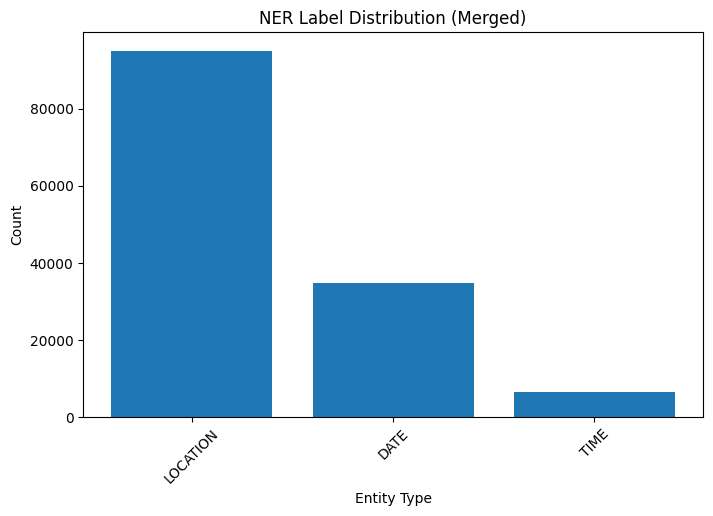

In [5]:


from collections import Counter

# ---------- Load your .conll file ----------
def load_conll(file_path):
    sentences = []
    sentence = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                if sentence:
                    sentences.append(sentence)
                    sentence = []
            else:
                parts = line.split('\t')
                if len(parts) >= 3:
                    token, pos, ner = parts[0], parts[1], parts[2]
                else:
                    token = parts[0]
                    pos = parts[1] if len(parts) > 1 else 'X'
                    ner = parts[2] if len(parts) > 2 else 'O'
                sentence.append((token, pos, ner))
    if sentence:
        sentences.append(sentence)
    return sentences

# ---------- Explore dataset ----------
input_dir = "datasets/3entity_annotated_ner_cleaned.conll"
sentences = load_conll(input_dir)

# Flatten all NER labels
all_labels = [ner for sentence in sentences for (_, _, ner) in sentence]

# Unique label classes
label_classes = set(all_labels)
print("Label classes:", label_classes)

# Distribution
label_counts = Counter(all_labels)
print("\nLabel distribution:")
for label, count in label_counts.most_common():
    print(f"{label}: {count}")


from collections import Counter
import matplotlib.pyplot as plt

# ---------- Mapping BIO tags to broader entity names ----------
merge_map = {
    "B-LOC": "LOCATION",
    "I-LOC": "LOCATION",
    "B-DATE": "DATE",
    "I-DATE": "DATE",
    "B-TIME": "TIME",
    "I-TIME": "TIME"
}

# Apply the mapping, skip 'O'
merged_labels = [
    merge_map.get(ner, ner)  # map if in merge_map else keep original
    for ner in all_labels
    if ner != "O"
]

# Count merged labels
label_counts = Counter(merged_labels)

# ---------- Plot ----------
plt.figure(figsize=(8, 5))
plt.bar(label_counts.keys(), label_counts.values())
plt.xticks(rotation=45)
plt.title("NER Label Distribution (Merged)")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.show()


In [14]:
# Define the set of valid/expected NER tags
expected_tags = {
    "O", 
    "B-LOC", "I-LOC",
    "B-DATE", "I-DATE",
    "B-TIME", "I-TIME",
}

# Open the file and check for invalid tags
file_path = "datasets/3entity_annotated_ner_cleaned_1.conll"

with open(file_path, 'r', encoding='utf-8') as f:
    for lineno, line in enumerate(f, 1):
        line = line.strip()
        if not line:
            continue  # skip blank lines
        parts = line.split('\t')
        if len(parts) >= 3:
            token, pos, ner = parts[0], parts[1], parts[2]
            if ner not in expected_tags:
                print(f"Line {lineno}: {line}")


Line 112540: ပ	part	B_PER
Line 125874: နာ	v	-PER
Line 141797: အီ	n	B_PER
Line 610299: ခဲ့	part	Oj
Line 1382069: မြို့	n	ရပ်ကွက်
Line 1444409: ဂွ	n	i-LOC
Line 1765845: နာရီ	n	အတွင်း
Line 1861915: ၁	num	II-TIME
Line 2027548: လမ်း	n	လ်
Line 2380892: စက်တင်ဘာ	n	B-
Line 2402369: ကျွန်းဆွယ်	n	ကျွန်းဆွယ်
Line 2485795: ဂျီ	n	o
Line 2624557: ခန့်	part	TIME


In [13]:
def clean_ner_tags(file_path, output_path, replacement_map):
    """
    Replace messy NER tags in the 3rd column according to replacement_map.
    
    Args:
        file_path (str): input .conll file
        output_path (str): output cleaned .conll file
        replacement_map (dict): {old_tag: new_tag}
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    cleaned_lines = []
    for line in lines:
        line_strip = line.strip()
        if line_strip == "":
            cleaned_lines.append("\n")
            continue
        parts = line_strip.split("\t")
        if len(parts) < 3:
            cleaned_lines.append(line)
            continue
        token, pos, ner = parts[0], parts[1], parts[2]
        if ner in replacement_map:
            ner = replacement_map[ner]
        cleaned_lines.append(f"{token}\t{pos}\t{ner}\n")
    
    with open(output_path, 'w', encoding='utf-8') as f:
        f.writelines(cleaned_lines)
    
    print(f"Cleaned file saved to {output_path}")


# ---------- Define your replacements ----------
replacement_map = {
    "IO": "O",
    "B_LOC": "B-LOC",
    "I_LOC": "I-LOC",
    "OE": "O",
    "-ORG": "O",
    "I-Land": "I-LOC",
    "BO": "O",
    "I_PER": "O",
    "I-LOCI-LOC": "I-LOC",
    "OI-PER": "O",
    "I-oRG": "O",
    "I-PEr": "O",
    "I_ORG" : "O",
    "B-LIC" : "B-LOC",
    "i-DATE" : "I-DATE"
}

# ---------- Usage ----------
input_file = "datasets/3entity_annotated_ner_cleaned.conll"
output_file = "datasets/3entity_annotated_ner_cleaned_1.conll"

clean_ner_tags(input_file, output_file, replacement_map)


Cleaned file saved to datasets/3entity_annotated_ner_cleaned_1.conll
